# LendingClub Data Analysis

RISK ANALYSIS

Data: publicly available data from [LendingClub.com](www.lendingclub.com). 

Lending data from 2007-2010, we are trying to classify and predict whether or not the borrower paid back their loan in full. The csv used has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Importing libraries for pandas and plotting.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

**Used pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
loans = pd.read_csv("loan_data.csv")

**Checked out the info(), head(), and describe() methods on loans.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Data visualization! We have used seaborn and pandas built-in plotting capabilities.

**Created a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**


Text(0.5, 0, 'FICO')

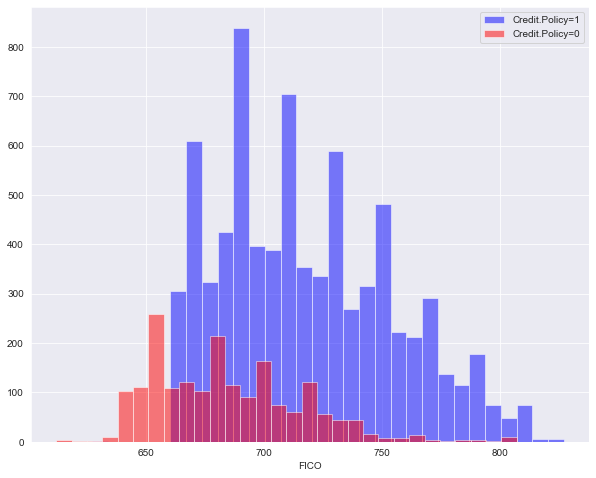

In [18]:
# loans.groupby('credit.policy')['fico'].hist(bins=30, alpha=0.5, figsize=(10,8))

plt.figure(figsize=(10,8))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')


**Created a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

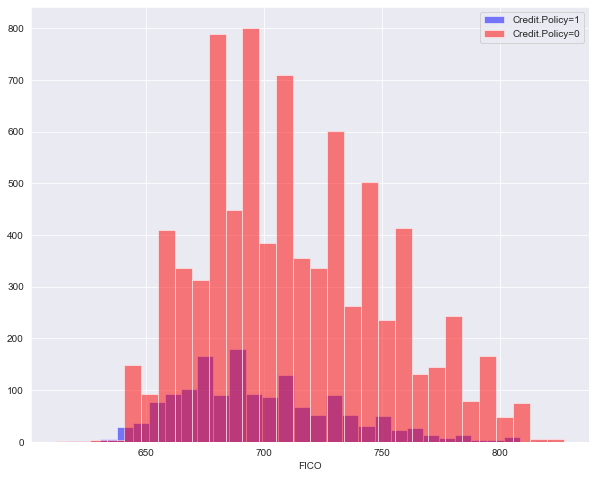

In [19]:
plt.figure(figsize=(10,8))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

**Created a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

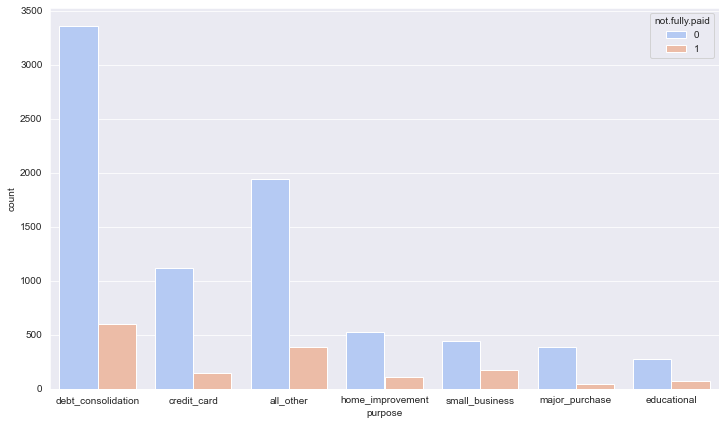

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(x= "purpose",hue= "not.fully.paid", data=loans, palette= "coolwarm")

**The trend between FICO score and interest rate.**

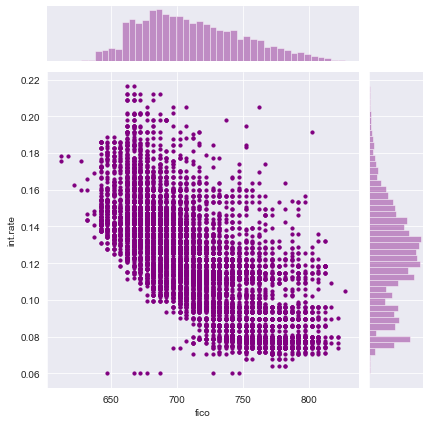

In [21]:
sns.jointplot(x="fico", y="int.rate", data= loans, color= "purple", s=10)

**Created the following lmplots to see if the trend differed between not.fully.paid and credit.policy.**

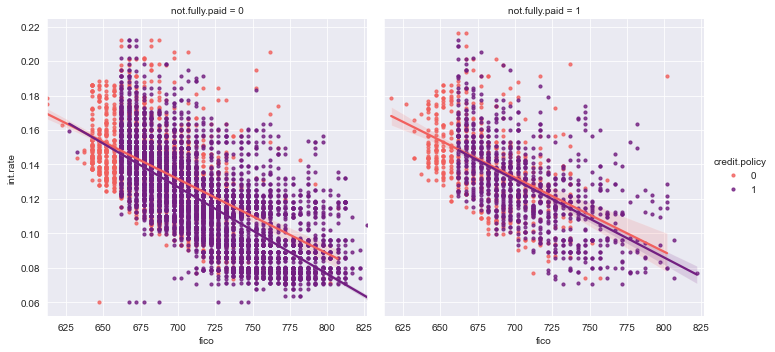

In [22]:
sns.lmplot(x= "fico", y="int.rate", data=loans, col="not.fully.paid", hue="credit.policy",palette= "magma_r", scatter_kws={"s":10})

# Setting up the Data

set up the data for Random Forest Classification Model!

**Check loans.info()**

In [23]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column is categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them.

**Created a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [24]:
cat_feats=['purpose']

**Used pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Have Set this dataframe as final_data.**

In [25]:
final_data= pd.get_dummies(loans, columns= cat_feats, drop_first=True)

In [26]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

Now its time to split the data into a training set and a testing set!

**Used sklearn to split data into a training set and a testing set.**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [28]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 101) 

## Training a Decision Tree Model


**Import DecisionTreeClassifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Created an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [30]:
dtree= DecisionTreeClassifier()
dt= DecisionTreeClassifier(max_depth=3)

In [31]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Created predictions from the test set and create a classification report and a confusion matrix.**

In [32]:
pred = dtree.predict(X_test)


In [33]:
score = accuracy_score(y_test, pred)
print("The accuracy of Decision tree is ",score*100,"%")

The accuracy of Decision tree is  72.89491997216423 %


In [34]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 349.93
|   |   |--- feature_9 <= 6.50
|   |   |   |--- feature_1 <= 0.08
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.08
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_8 <= 50.95
|   |   |   |   |   |   |--- feature_8 <= 1.35
|   |   |   |   |   |   |   |--- feature_4 <= 6.54
|   |   |   |   |   |   |   |   |--- feature_6 <= 1890.02
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 4.25
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 8.61
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  8.61
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_4 >  4.25
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_6 >  1890.02
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- fea

In [35]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

In [36]:
print(cr(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [37]:
print(cm(y_test, pred))

[[1999  432]
 [ 347   96]]


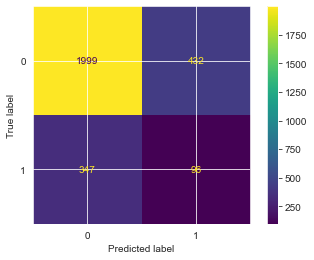

In [38]:

plot_confusion_matrix(dtree, X_test, y_test)  
plt.show()  

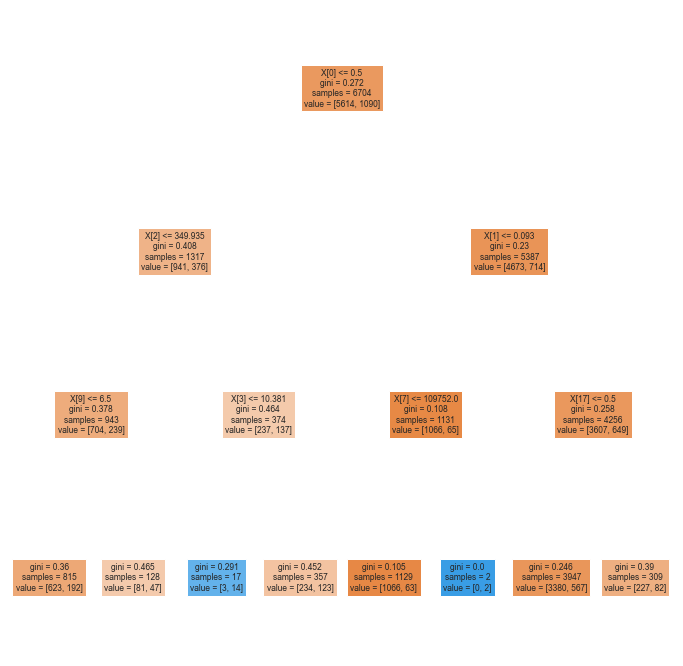

In [39]:
dt.fit(X_train, y_train)
#Displaying the Decision Tree
fig = plt.figure(figsize=(12,12))
_ = tree.plot_tree(dt,filled=True)

In [40]:
X_test_temp = X_test
X_test_temp

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
5244,1,0.1287,274.12,10.933107,23.57,687,5100.000000,11508,51.8,0,0,0,0,1,0,0,0,0
1739,1,0.1347,805.67,11.695247,24.50,712,6420.041667,81833,84.6,0,0,0,1,0,0,0,0,0
2780,1,0.0768,124.77,10.545341,13.45,802,4560.000000,3199,7.4,0,0,0,0,1,0,0,0,0
7062,1,0.1099,274.98,10.858999,18.62,702,4940.041667,9222,34.7,3,0,1,0,1,0,0,0,0
6661,1,0.1913,550.81,11.736069,9.96,687,4561.041667,12730,95.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9508,0,0.1218,466.20,10.736310,5.32,727,2280.041667,11781,37.8,5,0,0,0,1,0,0,0,0
4348,1,0.0894,111.21,10.239960,1.71,727,2099.958333,2697,69.2,1,0,0,0,0,0,0,0,0
4233,1,0.1253,167.34,9.862666,12.06,687,2190.000000,2365,60.6,0,0,0,0,1,0,0,0,0
5363,1,0.2017,447.01,11.225243,11.25,672,4530.000000,3672,79.8,0,0,0,0,0,0,0,0,1


## Training the Random Forest model


**Created an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc= RandomForestClassifier()

In [43]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluation

Predicted off the y_test values and evaluate our model.

**Predicted the class of not.fully.paid for the X_test data.**

In [44]:
rfc_pred= rfc.predict(X_test)

**Created a classification report from the results**

In [45]:
score = accuracy_score(y_test,rfc_pred)
print("The accuracy of Random Forest is ",score*100,"%")

The accuracy of Random Forest is  84.37717466945024 %


In [46]:
temp = final_data.drop('not.fully.paid', axis=1).mean()
for i in range(len(temp)):
    X_test_temp[final_data.drop('not.fully.paid', axis=1).columns[i]][5244]=int(input(final_data.drop('not.fully.paid', axis=1).columns[i]))

credit.policy1


<ipython-input-46-c2ac550cf612>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_temp[final_data.drop('not.fully.paid', axis=1).columns[i]][5244]=int(input(final_data.drop('not.fully.paid', axis=1).columns[i]))
C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


int.rate5
installment5
log.annual.inc3
dti5
fico1
days.with.cr.line5
revol.bal4
revol.util8
inq.last.6mths2
delinq.2yrs5
pub.rec5
purpose_credit_card2
purpose_debt_consolidation6
purpose_educational2
purpose_home_improvement1
purpose_major_purchase5
purpose_small_business2


In [47]:
rfc_pred_temp = rfc.predict(X_test_temp)
rfc_pred_temp[0]

0

In [48]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

In [49]:
print(cr(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.33      0.01      0.03       443

    accuracy                           0.84      2874
   macro avg       0.59      0.50      0.47      2874
weighted avg       0.77      0.84      0.78      2874



**Confusion Matrix for the predictions.**

In [50]:
print(cm(y_test, rfc_pred))

[[2419   12]
 [ 437    6]]
